In [1]:
import numpy as np
from PatchGenerator import PatchGenerator 
import keras
from os import listdir
from os.path import join
from random import sample
from sklearn import metrics

Using TensorFlow backend.
/hpc/eb/RedHatEnterpriseServer7/Python/3.6.3-foss-2017b/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def makeNetwerk():
    Input = keras.layers.Input(shape=(21,21,1))
    hidden = keras.layers.Conv2D(32,3)(Input)
    hidden = keras.layers.Conv2D(32,3,activation="relu")(hidden)
    hidden = keras.layers.Conv2D(32,3,activation="relu")(hidden)
    hidden = keras.layers.Flatten()(hidden)
    output = keras.layers.Dense(2,activation="softmax")(hidden)
    
    model = keras.models.Model(Input,output)
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
    

In [3]:
from matplotlib import pyplot as plt
class PlotLosses(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs['loss'])
        self.val_losses.append(logs['val_loss'])
        self.i += 1

        #plt.clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.grid()
        plt.legend()
        plt.show();

In [4]:
dataRoot = "./regions"
files = listdir(join(dataRoot,"images"))
valFiles = sample(files,int(len(files)*0.3))
trainFiles = [f for f in files if not f in valFiles]
testFiles = sample(trainFiles,int(len(files)*0.3))
trainFiles = [f for f in trainFiles if not f in testFiles]

Epoch 1/20
50/50 [==============================] - 4s 85ms/step - loss: 0.6209 - acc: 0.6694 - val_loss: 0.4419 - val_acc: 0.8750


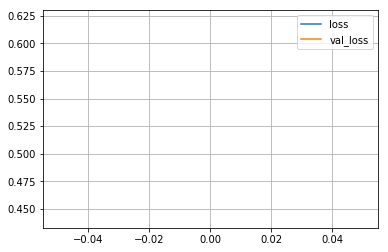

Epoch 2/20
50/50 [==============================] - 3s 59ms/step - loss: 0.4533 - acc: 0.7981 - val_loss: 0.4017 - val_acc: 0.8625


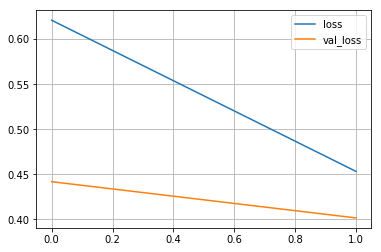

Epoch 3/20
50/50 [==============================] - 3s 55ms/step - loss: 0.4175 - acc: 0.8150 - val_loss: 0.3278 - val_acc: 0.8438


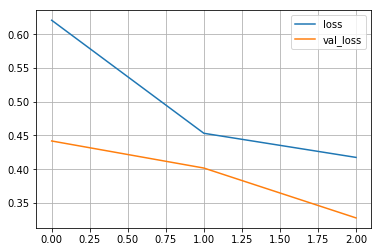

Epoch 4/20
50/50 [==============================] - 3s 57ms/step - loss: 0.3803 - acc: 0.8425 - val_loss: 0.3483 - val_acc: 0.8500


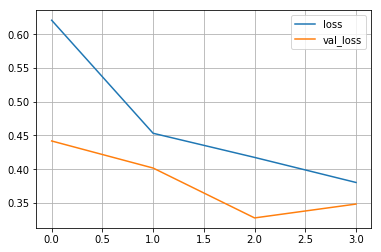

Epoch 5/20
50/50 [==============================] - 3s 59ms/step - loss: 0.3492 - acc: 0.8506 - val_loss: 0.2085 - val_acc: 0.9437


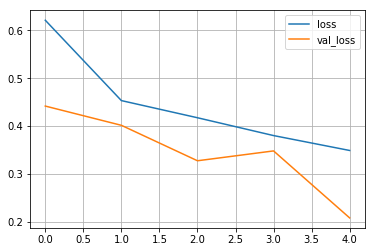

Epoch 6/20
50/50 [==============================] - 3s 58ms/step - loss: 0.3508 - acc: 0.8569 - val_loss: 0.3180 - val_acc: 0.8812


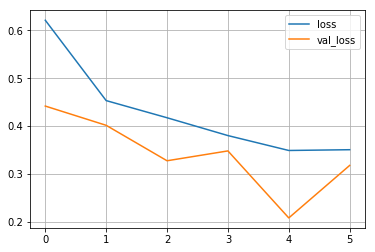

Epoch 7/20
50/50 [==============================] - 3s 64ms/step - loss: 0.3237 - acc: 0.8688 - val_loss: 0.2939 - val_acc: 0.8562


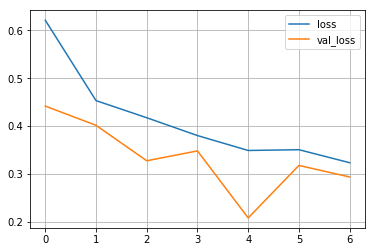

Epoch 8/20
50/50 [==============================] - 3s 52ms/step - loss: 0.3305 - acc: 0.8656 - val_loss: 0.4053 - val_acc: 0.8438


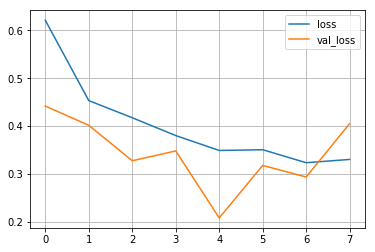

Epoch 9/20
50/50 [==============================] - 3s 53ms/step - loss: 0.3063 - acc: 0.8725 - val_loss: 0.3942 - val_acc: 0.8562


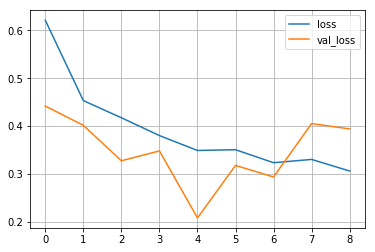

Epoch 10/20
50/50 [==============================] - 3s 59ms/step - loss: 0.2919 - acc: 0.8819 - val_loss: 0.2796 - val_acc: 0.8812


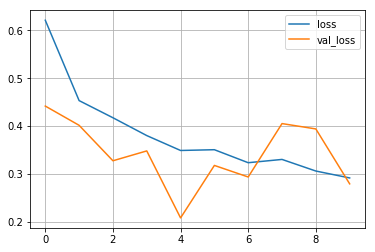

Epoch 11/20
50/50 [==============================] - 3s 61ms/step - loss: 0.3064 - acc: 0.8812 - val_loss: 0.3274 - val_acc: 0.8688


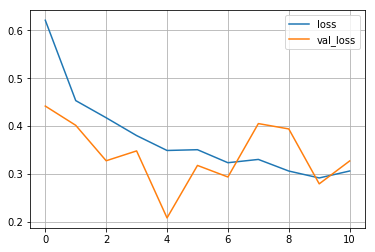

Epoch 12/20
50/50 [==============================] - 3s 59ms/step - loss: 0.2725 - acc: 0.8975 - val_loss: 0.2960 - val_acc: 0.9062


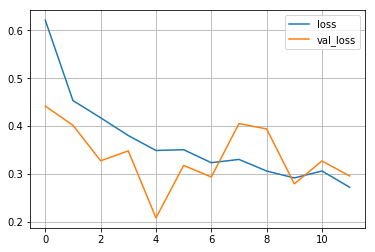

Epoch 13/20
50/50 [==============================] - 3s 61ms/step - loss: 0.3063 - acc: 0.8881 - val_loss: 0.3088 - val_acc: 0.9125


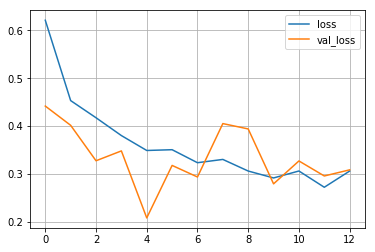

Epoch 14/20
50/50 [==============================] - 3s 57ms/step - loss: 0.3013 - acc: 0.8869 - val_loss: 0.2296 - val_acc: 0.9187


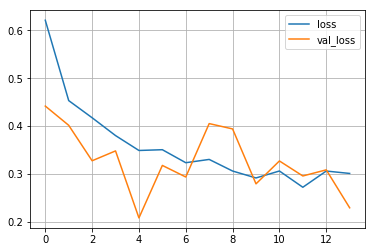

Epoch 15/20
50/50 [==============================] - 3s 56ms/step - loss: 0.3077 - acc: 0.8731 - val_loss: 0.2773 - val_acc: 0.9000


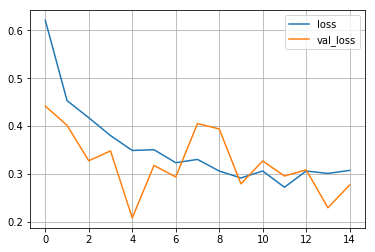

Epoch 16/20
50/50 [==============================] - 3s 54ms/step - loss: 0.2885 - acc: 0.8775 - val_loss: 0.3125 - val_acc: 0.8812


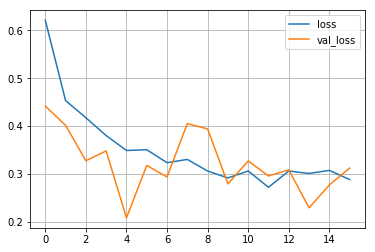

Epoch 17/20
50/50 [==============================] - 2s 49ms/step - loss: 0.3269 - acc: 0.8581 - val_loss: 0.4786 - val_acc: 0.8000


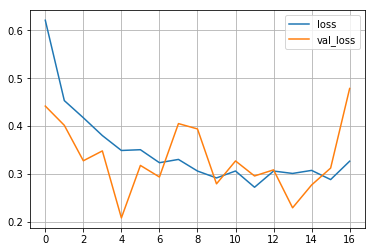

Epoch 18/20
50/50 [==============================] - 3s 56ms/step - loss: 0.2638 - acc: 0.8869 - val_loss: 0.2384 - val_acc: 0.8938


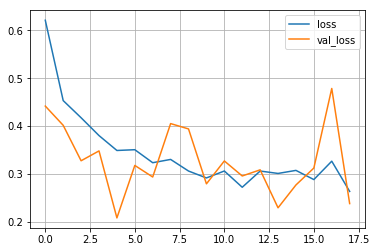

Epoch 19/20
50/50 [==============================] - 3s 59ms/step - loss: 0.2422 - acc: 0.9069 - val_loss: 0.3697 - val_acc: 0.8688


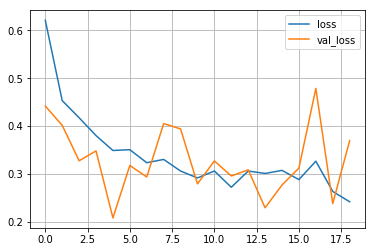

Epoch 20/20
50/50 [==============================] - 3s 51ms/step - loss: 0.2933 - acc: 0.8762 - val_loss: 0.4065 - val_acc: 0.8250


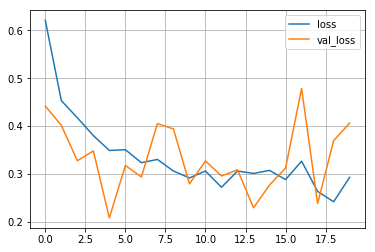

In [5]:
network_path = "./models/bestModel.h5"
model = makeNetwerk()
train_gen = PatchGenerator(dataRoot,32,10,(21,21),fileSet=trainFiles)
val_gen = PatchGenerator(dataRoot,32,10,(21,21),fileSet=valFiles)

callbacks_list = [
    #keras.callbacks.ModelCheckpoint(network_path, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1),
    #keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto'),
    #keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', cooldown=0, min_lr=0),
    PlotLosses()
]

history = model.fit_generator(train_gen,steps_per_epoch=50, epochs=20,callbacks=callbacks_list,validation_data=val_gen,validation_steps=5)

In [18]:
def predictWithModel(model,generator,batches=10):
    true = []
    pred = []
    for _ in range(batches):
        X,Y = generator.next()
        true.append(np.argmax(Y,axis=1))
        p = model.predict(X)
        pred.append(p)
    true = np.concatenate(true,axis=0)
    pred = np.concatenate(pred,axis=0)
    return true,pred

In [19]:
def makeRUC(model,generator,batches=10):
    true,pred = predictWithModel(model,generator,batches=batches)
    
    # Compute the roc curve and the area under the curve
    fpr, tpr, thresholds_roc = metrics.roc_curve(true, pred[:,1])
    auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [45]:
def makeConfusionMatrix(model,generator,threshold,batches=10):
    true,pred = predictWithModel(model,generator,batches=batches)
    thres = pred[:,1] > threshold
    
    convMat = metrics.confusion_matrix(true, thres)
    print(convMat/np.matlib.repmat(np.sum(convMat,axis=0),2,1))

In [46]:
test_gen = PatchGenerator(dataRoot,32,10,(21,21),fileSet=testFiles)
#makeRUC(model,test_gen,batches=10)
makeConfusionMatrix(model,test_gen,0.5,batches=10)

[[ 0.96031746  0.20103093]
 [ 0.03968254  0.79896907]]
